/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

         Date  Forecasted MIBOR QoQ(%)
34 2025-06-30                 0.066435
35 2025-09-30                 0.067696
36 2025-12-31                 0.068257
37 2026-03-31                 0.068013
38 2026-06-30                 0.067814


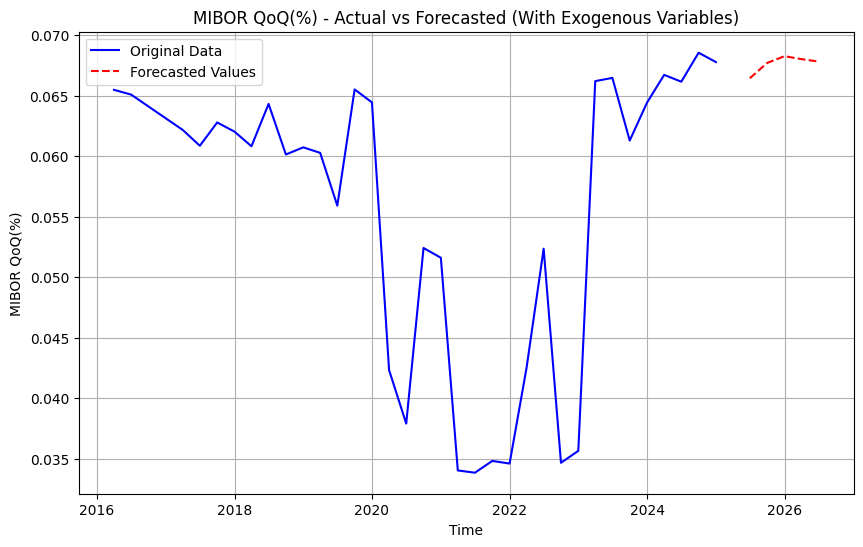

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Step 1: Load the data
file_path = '/content/Final QoQ Data.xlsx'  # Replace with your file path
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')  # Load the first sheet

# Step 2: Preprocess the data
# Adjust the mapping of quarters to months (starting with April)
def convert_to_datetime(row):
    quarter_mapping = {'(Q1)': '04', '(Q2)': '07', '(Q3)': '10', '(Q4)': '01'}
    year = int(row['Year'])
    month = int(quarter_mapping[row['Quarter']])
    # Adjust year for Q4, as it corresponds to January of the next year
    if month == 1:
        year += 1
    return datetime(year, month, 1)

df['Date'] = df.apply(convert_to_datetime, axis=1)
df = df.sort_values('Date').set_index('Date')

# Define target variable and exogenous variables
y = df['MIBOR QoQ(%)']
X = df[['GDP QoQ(%)', 'CPI QoQ(Numbers)']]

# Step 3: Fit the SARIMAX model to the entire dataset
model_full = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sarimax_result_full = model_full.fit()

# Step 4: Forecast for future periods
forecast_periods = 5  # Number of periods to forecast
future_forecast = sarimax_result_full.forecast(steps=forecast_periods, exog=X[-forecast_periods:])

# Create a date range for the future periods based on the last date in the dataset
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_periods + 1, freq='Q')[1:]

# Create a DataFrame for the forecasted values
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted MIBOR QoQ(%)': future_forecast})

# Print the forecasted DataFrame
print(future_forecast_df)

# Step 5: Visualize the actual and forecasted values
plt.figure(figsize=(10, 6))

# Plot the original data (blue)
plt.plot(y, label='Original Data', color='blue')

# Plot the forecasted values (red dashed line)
plt.plot(future_forecast_df['Date'], future_forecast_df['Forecasted MIBOR QoQ(%)'], label='Forecasted Values', color='red', linestyle='--')

# Add titles and labels
plt.title('MIBOR QoQ(%) - Actual vs Forecasted (With Exogenous Variables)')
plt.xlabel('Time')
plt.ylabel('MIBOR QoQ(%)')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Print the forecasted DataFrame
print(future_forecast_df)

         Date  Forecasted MIBOR QoQ(%)
34 2025-06-30                 0.066435
35 2025-09-30                 0.067696
36 2025-12-31                 0.068257
37 2026-03-31                 0.068013
38 2026-06-30                 0.067814
